# House Sale Predictive Model

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Dataset: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv

Target: 'price'

**1 - Dataset**
- Display the data types of each column.

**2 - Data Wrangling**
- Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. 

- Check if there are any NaN values and treat them accordingly

**3 - Exploratory Analysis**
- Count the number of houses with unique floor values, show in a dataframe

- Use a visual chart to show if houses with or without waterfront have more outliers

- Use a visual chart determine if the feature sqft_above is negatively or positively correlated with price. Check the correlation numerically after.

**4 - Model Development**
- Train a linear regression model with 'long' feature and calculate R-squared. Repeat for feature 'sqft_living'

- Train a linear regression model with the features "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living". Calculate R-squared 

- Create a pipeline object to predict the 'price' [StandardScaler(), PolynomialFeatures(include_bias=False), LinearRegression()], fit the object using the features listed before and calculate R-squared.

**5 - Model Evaluation and Refinement**
- Split the data into training and testing sets, 85% of data to train the model

- Create and train a Ridge regression object, regularization parameter = 0.1, and calculate the R-squared for the test data

- Perform a second order polynomial transform on the training data and testing data. Create and fit a Ridge regression object, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
%matplotlib inline

# 1 - Dataset

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
print(df.shape)
df.head()

(21613, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2 - Data Wrangling

In [5]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Checking for NaN

df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [7]:
#  Replacing the missing values of the column 'bedrooms' and 'bathroom' by their mean

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [8]:
#Checking results

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 3 - Exploratory Analysis

In [9]:
df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


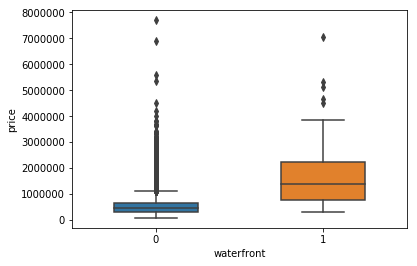

In [10]:
# Investigation outliers of waterfront
box_plot=sns.boxplot(x='waterfront', y='price', data=df, width=0.5)

## Results: More outliers in houses without waterfront

C:\Users\blemb\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


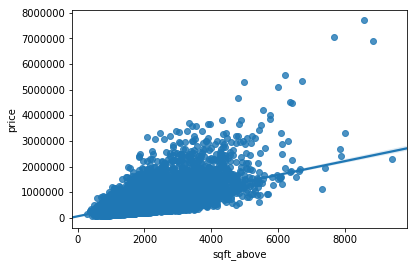

In [11]:
# Checking correlation with visual -  Residuals of linear regression model

reg_plot = sns.regplot(x='sqft_above', y='price', data=df)

In [12]:
## Results: Positive impact - price increases with sqft_above increase, but it doesn't seems like a strong correlation.

In [13]:
# Correlation in numbers

df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [14]:
# Results: 'sqf_above' has a correlation of 0.605567 with 'price' - positive, but not a strong one.

# 4 - Model Development

In [15]:
# 'long' vs 'price' linear model

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [16]:
# Results: R-squared of 0.047% -> Expected, as the correlation of 'long' and 'price' is very low [0.021626]
# 'long' alone can't be used to fit a good model for 'price'

In [17]:
#'sqft_living' vs 'price' linear model

X = df[['sqft_living']]
Y = df['price']

lm2 = LinearRegression()
lm2.fit(X,Y)
lm2.score(X,Y)

0.49285321790379316

In [18]:
# Results: R-squared of 49.3% -> Expected, as the correlation of those is fairly strong [0.702035]
# 'sqft_living' is a good feature to fit a model for 'price', but we can still get better results

In [19]:
# Grouping features to be used in the upcoming models

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",\
           "sqft_living15","sqft_above","grade","sqft_living"]   

In [20]:
# features vs 'price' linear model

X = df[features]
Y = df['price']

lm3 = LinearRegression()
lm3.fit(X,Y)
lm3.score(X,Y)

0.657679183672129

In [21]:
# Results: R-squared of 65.8% -> Expected, as there were used the top 11 features correlated to 'price'
# These 11 features can fit a model that explains 65.8% of the data used in training correctly

In [22]:
# List of tuples for pipeline creation

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [23]:
# Pipeline model with polynomial features

X = df[features]
Y = df['price']

pipe_model = Pipeline(Input)
pipe_model.fit(X,Y)
pipe_model.score(X,Y)

0.7513408553851407

In [24]:
## Results: R-square of 75.1%, using the same features. Expected, as polynomial features 
## adds complexity to the model, so the model gains flexibility

# 5 - Model Evaluation and Refinement

In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

# Splitting data into training and testing, 85% for training.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [26]:
# Model with Ridge Regression

rid_m = Ridge(alpha=0.1)

rid_m.fit(x_train, y_train) # training
rid_m.score(x_test, y_test) # testing with new data

0.6478759163939121

In [27]:
## Results: Ridge Regression scored a R-squared of 64.8%, but this time for a new set of data presented [test data]
## after training. Ridge regression is used to regularize and reduce the standard errors to avoid over-fitting.

In [28]:
# Second order polynomial transformation

poly = PolynomialFeatures(degree=2)

x_test_pr = poly.fit_transform(x_test)
x_train_pr = poly.fit_transform(x_train)

#Ridge Regression after polynomial transformation
rid2 = Ridge(alpha=0.1)
rid2.fit(x_train_pr, y_train) # training
rid2.score(x_test_pr, y_test) # testing

0.7002744279699229

In [29]:
## Results: The Combination of Ridge Regression and Polynomial transformation results in 
## a better model than just the Ridge model before, as here R-squared = 70%

This project was made by Bruna Lemberck as one of the hands-on projects of
IBM's Data Science Professional Certificate.